## 1. Import libraries

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib.pyplot  import figure 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


## 2. Import DataSet

In [1]:
df=pd.read_csv('Melbourne_housing/Melbourne_housing.csv')

NameError: name 'pd' is not defined

## 3. Exploratory Analysis

In [3]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

## Remove Variables

In [5]:
## remove non-numerical values
del df['Address']
del df['Method']
del df['SellerG']
del df['Date']
del df['Postcode']
del df['YearBuilt']
del df['Type']
del df['Lattitude']
del df['Longtitude']
del df['Regionname']
del df['Suburb']
del df ['CouncilArea']

In [6]:
df.head()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Propertycount
0,2,NaN,2.5,2.0,1.0,1.0,126.0,NaN,4019.0
1,2,1480000.0,2.5,2.0,1.0,1.0,202.0,NaN,4019.0
2,2,1035000.0,2.5,2.0,1.0,0.0,156.0,79.0,4019.0
3,3,NaN,2.5,3.0,2.0,1.0,0.0,NaN,4019.0
4,3,1465000.0,2.5,3.0,2.0,0.0,134.0,150.0,4019.0


In [7]:
df.shape

(34857, 9)

In [8]:
df.isnull().sum()

Rooms                0
Price             7610
Distance             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
Propertycount        3
dtype: int64

## heatmap to analyze the correlation

In [9]:
df_heat = df.corr()


<AxesSubplot:>

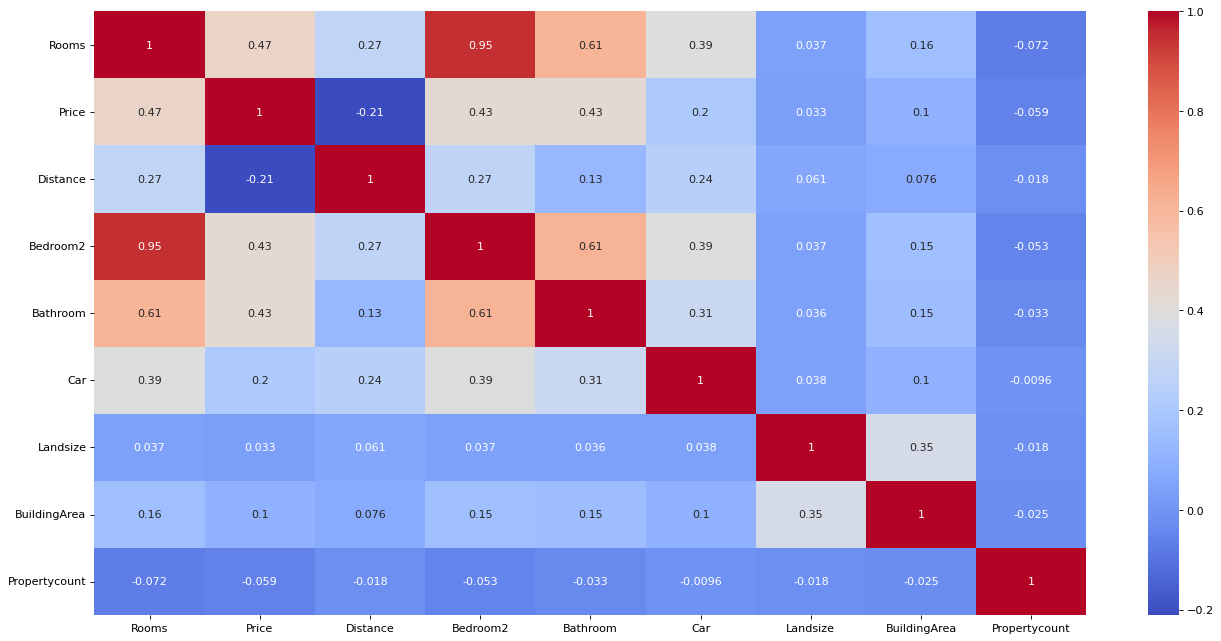

In [10]:
figure(figsize=(20,10),dpi=80)
sns.heatmap(df_heat,annot=True,cmap='coolwarm')

## Findings from the heatmap
- Bedroom2 is highly correlated with Rooms (0.95)
- Because there are no missing values for the variable Rooms and 8,226 missing values for Bedroom2, you will include the former in our model and remove the latter.
- landsize (0.033) and Propertycount (0.059) can also be removed as these variables show low correlation to the dependent variable of Price, which is again undesirable for our linear regression model.

In [11]:
del df['Landsize']
del df['Propertycount']
del df['Bedroom2']

## 4. Handling missing values

In [12]:
df.isnull().sum()

Rooms               0
Price            7610
Distance            1
Bathroom         8226
Car              8728
BuildingArea    21115
dtype: int64

Remove Building area, especially as it’s not highly correlated with the dependent variable of Price (0.1).

In [13]:
del df ['BuildingArea']

### Let's now handle the remaining missing values


Based on exploratory data analysis, you can:

Use the mean to fill variables with partial correlation to Price (i.e., Car).

Remove rows for variables with a small number of missing values (i.e., Distance).

Avoid filling values for variables with significant correlation to Price and, instead, remove those missing values row-by-row (i.e., Bathroom).

Variable |Missing Values |Correlation to Price | Actoin
-----|-----|----- |------
Rooms|0|0.47|Nothing
Price|7610|1|Remove missing values
Distance|1|-0.21|Remove missing row
Bathroom|8226|0.43|Remove missing rows
Car|8728|0.2|Fill with mean
BuildingArea|21115|0.1|Remove variable

In [14]:
#Fill missing values with the mean for the variable Car
df['Car'].fillna(df['Car'].mean(),inplace=True)


In [15]:
df.isnull().sum()

Rooms          0
Price       7610
Distance       1
Bathroom    8226
Car            0
dtype: int64

In [16]:
#Drop remaining missing values on a row-by-row basis
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [17]:
df.shape

(20800, 5)

## 5. Set X and y variables

In [ ]:
y=mx+c

In [18]:
y=df[['Price']]
X=df.drop(columns='Price')

In [19]:
y

1        1480000.0
2        1035000.0
4        1465000.0
5         850000.0
6        1600000.0
           ...    
34851    1101000.0
34852    1480000.0
34853     888000.0
34854     705000.0
34856    1020000.0
Name: Price, Length: 20800, dtype: float64

In [20]:
X

,Rooms,Distance,Bathroom,Car
1,2,2.5,1.0,1.000000
2,2,2.5,1.0,0.000000
4,3,2.5,2.0,0.000000
5,3,2.5,2.0,1.000000
6,4,2.5,1.0,2.000000
...,...,...,...,...
34851,3,6.3,1.0,1.728845
34852,4,6.3,1.0,3.000000
34853,2,6.3,2.0,1.000000
34854,2,6.3,1.0,2.000000


## Split the data into training and test sets using a standard 70/30 split.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10, shuffle=True)

## 6. Build the model

In [23]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

## 7. Find y-intercept and X coefficients

In [25]:
#Find y-intercept
lr.intercept_

282725.3156777328

In [26]:
lr.coef_

array([269450.10790037, -37787.76622417, 207173.05927097,  47417.17159475])

In [27]:
model_results = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficients'])
model_results

,Coefficients
Rooms,269450.107900
Distance,-37787.766224
Bathroom,207173.059271
Car,47417.171595


In [30]:
df.head()

,Rooms,Price,Distance,Bathroom,Car
1,2,1480000.0,2.5,1.0,1.0
2,2,1035000.0,2.5,1.0,0.0
4,3,1465000.0,2.5,2.0,0.0
5,3,850000.0,2.5,2.0,1.0
6,4,1600000.0,2.5,1.0,2.0


## 8. Predict

In [31]:
new_house = [
3, #Rooms
2.5, #Distance
2.0, #Bathroom
0.0, #Car
]

new_house_predict = lr.predict([new_house])
new_house_predict

array([1410952.34236036])

The predicted value of this house is AUD $1410952.342360. 

The actual value of this house, according to the dataset, is AUD $1465000.

## 9. Evaluate the model

In [32]:
prediction = lr.predict(X_test)


In [33]:
metrics.mean_absolute_error(y_test, prediction)

363782.9423236322

## Interpretation
The mean absolute error is 363782.9423236326, which means that the model miscalculated the actual property listing’s price by approximately $363,782 on average.

This relatively high error rate is not unexpected since we removed 16 variables from the original dataset. The Type (house, unit, or apartment) variable, for example, is a major indicator of house value. However, because this variable is expressed non-numerically, we didn’t include it in our model. However, you could decide to rebuild the model and convert Type into numeric variables using one-hot encoding.

Also, while linear regression is extremely fast to run, it is not known for its prediction accuracy. However, there are more reliable algorithms out there, as we will cover in the following chapters.